In [65]:
import numpy as np
import csv
# from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from model import Network, SimpleNET, ResNet
from config.ResNet_config_aug import *
from augmentation import * # transforms_0, transforms_1, transforms_1_test, transforms_2, transforms_2_test
from train import train

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Traceback (most recent call last):
  File "/appl/python/3.8.2/lib/python3.8/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/appl/python/3.8.2/lib/python3.8/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/appl/python/3.8.2/lib/python3.8/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/appl/python/3.8.2/lib/python3.8/shutil.py", line 719, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/appl/python/3.8.2/lib/python3.8/shutil.py", line 717, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-2mzd_a5o'


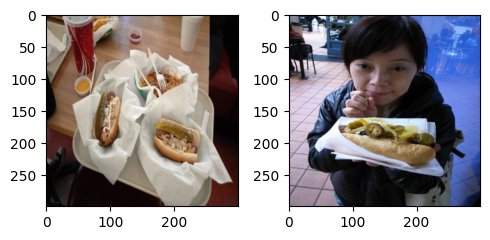

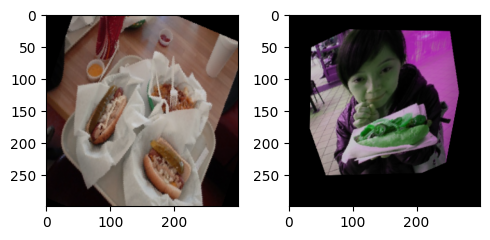

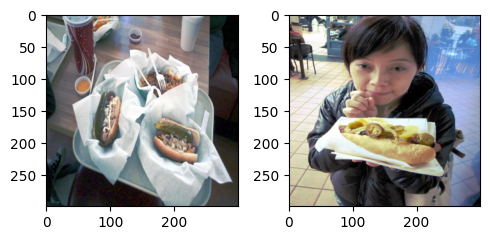

In [73]:
for i, (transform, test_transform) in enumerate(zip(TRANSFORMS, TEST_TRANSFORMS)):
    torch.manual_seed(1)
    trainset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/train', transform=transform)
    train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=16)
#     print(len(trainset))
#     break
    testset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/test', transform=test_transform)
    test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=16)
    fig, ax = plt.subplots(1,2, figsize=(5,3))

    img, lab = next(iter(train_loader))
    for j in range(2):
        one_img = img[j+2,:,:,:].permute(1,2,0).detach().numpy()
        ax[j].imshow(one_img, cmap='gray')
    plt.tight_layout()
    plt.show()
#     print(img.shape)

In [54]:
import os
scores = []
files = os.listdir('results/AUG/ResNet')
files_25 = sorted([f for f in files if f.startswith('4_kernel_4_blocks_25')])
for f in files_25:
    last_score = np.genfromtxt('results/AUG/ResNet/'+f, delimiter=',', names=True)[-1]
    scores.append(last_score)


In [64]:
scores = np.array([list(s) for s in scores])
print(scores[:5].mean(axis=0)[:2].round(2))
print(scores[5:10].mean(axis=0)[:2].round(2))
print(scores[10:].mean(axis=0)[:2].round(2))

[0.7  0.71]
[0.65 0.66]
[0.89 0.71]


In [63]:
print(scores[:5].std(axis=0)[:2].round(3))
print(scores[5:10].std(axis=0)[:2].round(3))
print(scores[10:].std(axis=0)[:2].round(3))

[0.059 0.005]
[0.059 0.047]
[0.09  0.007]


In [60]:
files_25

['4_kernel_4_blocks_25_epochs_1e-04_lr_Adam_optim_0.7_dropout_0.001_decay_auto_augmentation_0_iter.csv',
 '4_kernel_4_blocks_25_epochs_1e-04_lr_Adam_optim_0.7_dropout_0.001_decay_auto_augmentation_1_iter.csv',
 '4_kernel_4_blocks_25_epochs_1e-04_lr_Adam_optim_0.7_dropout_0.001_decay_auto_augmentation_2_iter.csv',
 '4_kernel_4_blocks_25_epochs_1e-04_lr_Adam_optim_0.7_dropout_0.001_decay_auto_augmentation_3_iter.csv',
 '4_kernel_4_blocks_25_epochs_1e-04_lr_Adam_optim_0.7_dropout_0.001_decay_auto_augmentation_4_iter.csv',
 '4_kernel_4_blocks_25_epochs_1e-04_lr_Adam_optim_0.7_dropout_0.001_decay_custom_augmentation_0_iter.csv',
 '4_kernel_4_blocks_25_epochs_1e-04_lr_Adam_optim_0.7_dropout_0.001_decay_custom_augmentation_1_iter.csv',
 '4_kernel_4_blocks_25_epochs_1e-04_lr_Adam_optim_0.7_dropout_0.001_decay_custom_augmentation_2_iter.csv',
 '4_kernel_4_blocks_25_epochs_1e-04_lr_Adam_optim_0.7_dropout_0.001_decay_custom_augmentation_3_iter.csv',
 '4_kernel_4_blocks_25_epochs_1e-04_lr_Adam_opt